In [1]:
#!conda update conda
#!pip install update pip
#!pip install update cobra
#!pip install update pip
#!pip install update  joblib 
#!pip install update  multiprocess
#!pip install update networkx
#!pip install update  pandas 
#!pip install update numpy 
#!pip install update scipy    
#normal.reactions.get_by_id("PHETHPTOX2").bounds = (0, 0.0)
#normal.reactions.get_by_id("r0399").bounds = (0.0, 0.0)
#cobra.io.save_json_model(normal, "PKU.json")
#model = cobra.io.load_matlab_model('GEM_Recon3_thermocurated_redHUMAN.mat')
#cobra.io.save_json_model(model, "GEM_Recon3_thermocurated_redHUMAN.json")

In [49]:
import cobra
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
normal = cobra.io.load_json_model("GEM_Recon3_thermocurated_redHUMAN.json")
pku    = cobra.io.load_json_model("PKU.json")
rxn_ids_list     = [normal.reactions[i].id  for i in range(0,len(normal.reactions))]
met_ids_list     = [normal.metabolites[i].id  for i in range(0,len(normal.metabolites))]
rxn_names_list   = [normal.reactions[i].name  for i in range(0,len(normal.reactions))]
met_names_list   = [normal.metabolites[i].name  for i in range(0,len(normal.metabolites))]

print(
normal.reactions.get_by_id("PHETHPTOX2").bounds, 
normal.reactions.get_by_id("r0399").bounds) 
print(
pku.reactions.get_by_id("PHETHPTOX2").bounds, 
pku.reactions.get_by_id("r0399").bounds) 

(0.0, 100.0) (0.0, 100.0)
(0.0, 0.0) (0.0, 0.0)


In [70]:
#normal.metabolites.get_by_id("phe_L_e").reactions
frozen = normal.metabolites.get_by_id("tyr_L_e").reactions

list(frozen)[0].id


'TYRATB0tc'

normal.reactions.get_by_id("TYRt").bounds = (0, 0)
normal.reactions.get_by_id("TYRt4").bounds = (0, 0)
normal.reactions.get_by_id("r1549").bounds = (0, 0)
normal.reactions.get_by_id("r1563").bounds = (0, 0)
normal.reactions.get_by_id("r1576").bounds = (0, 0)
normal.reactions.get_by_id("r1588").bounds = (0, 0)
normal.reactions.get_by_id("r1599").bounds = (0, 0)


In [52]:
sol_normal = normal.optimize()
sol_pku    = pku.optimize()

tyrosine_fluxes = ['PHETHPTOX2','r0399','TYRt', 'TYRt4', 'r1549', 'r1563', 'r1576', 'r1588', 'r1599']
print( sol_pku[tyrosine_fluxes] )
print( sol_normal[tyrosine_fluxes])

PHETHPTOX2    0.0
r0399         0.0
TYRt          0.0
TYRt4         0.0
r1549         0.0
r1563         0.0
r1576         0.0
r1588         0.0
r1599         0.0
Name: fluxes, dtype: float64
PHETHPTOX2    0.0
r0399         0.0
TYRt          0.0
TYRt4         0.0
r1549         0.0
r1563         0.0
r1576         0.0
r1588         0.0
r1599         0.0
Name: fluxes, dtype: float64


In [31]:

dual_normal     =  sol_normal.shadow_prices.values.reshape(len(met_ids_list),1).flatten()
fluxes_normal   =  sol_normal.fluxes.values.reshape(len(rxn_ids_list),1).flatten()
reduced_normal  =  sol_normal.reduced_costs.values.reshape(len(rxn_ids_list),1).flatten()

dual_pku     =  sol_pku.shadow_prices.values.reshape(len(met_ids_list),1).flatten()
fluxes_pku   =  sol_pku.fluxes.values.reshape(len(rxn_ids_list),1).flatten()
reduced_pku  = sol_pku.reduced_costs.values.reshape(len(rxn_ids_list),1).flatten()


### the nine amino acids humans cannot synthesize are phenylalanine, valine, threonine, tryptophan, methionine, leucine, isoleucine, lysine, and histidine.

In [71]:
import pandas as pd    

list_of_tuples   = list(zip(met_ids_list, met_names_list, dual))  
columns          = ["Metabolite ID","Metabolite Name","Dual solution"]
dual_solution    = pd.DataFrame(list_of_tuples, columns = columns)  
list_of_tuples   = list(zip(rxn_ids_list,rxn_names_list,fluxes,reduced ))  
columns          = ["Reaction ID","Reaction Name","Flux","Reduced Cost"]
primal_solution  = pd.DataFrame(list_of_tuples, columns = columns)  

dual_solution.to_csv('dual_solution.csv')
primal_solution.to_csv('primal_solution.csv')

,0,1,2
0,10fthf5glu_c,10-Formyltetrahydrofolate-[Glu](5),-1.734058e-17
1,10fthf5glu_l,10-Formyltetrahydrofolate-[Glu](5),-1.734058e-17
2,10fthf5glu_m,10-Formyltetrahydrofolate-[Glu](5),0.000000e+00
3,10fthf6glu_c,10-Formyltetrahydrofolate-[Glu](6),0.000000e+00
4,10fthf6glu_l,10-Formyltetrahydrofolate-[Glu](6),0.000000e+00
...,...,...,...
5830,caproic_e,Caproic Acid,0.000000e+00
5831,1a25dhvitd2_c,"1-Alpha,25-Dihydroxyvitamin D2",0.000000e+00
5832,1a25dhvitd2_e,"1-Alpha,25-Dihydroxyvitamin D2",0.000000e+00
5833,protein_c,Torasemide-M3,3.719474e-16


In [3]:
from cobra import Model, Reaction, Metabolite
ALDH1L1 = Reaction('ALDH1L1')
ALDH1L1.name = 'ALDH1L1'
#ALDH1L1.subsystem = ''
ALDH1L1.lower_bound = 0.  # This is the default
ALDH1L1.upper_bound = 1000.  # This is the default

ALDH1L1.add_metabolites({
    stimulated.metabolites.get_by_id('10fthf[mA]') : -1.0,
    stimulated.metabolites.get_by_id('h2o[mA]')    : -1.0,
    stimulated.metabolites.get_by_id('nadp[mA]')   : -1.0,
    stimulated.metabolites.get_by_id('co2[mA]'): 1.0,
    stimulated.metabolites.get_by_id('nadph[mA]'): 1.0,
    stimulated.metabolites.get_by_id('h[mA]'): 1.0,
    stimulated.metabolites.get_by_id('thf[mA]'): 1.0
})

stimulated.add_reactions([ALDH1L1])
stimulated.reactions.get_by_id('ALDH1L1')

Reaction identifier,ALDH1L1
Name,ALDH1L1
Memory address,0x07f8c0209a8b0
Stoichiometry,"10fthf[mA] + h2o[mA] + nadp[mA] --> co2[mA] + h[mA] + nadph[mA] + thf[mA] 10-Formyltetrahydrofolate + H2O + Nicotinamide adenine dinucleotide phosphate --> CO2 + H+ + Nicotinamide adenine dinucleotide phosphate - reduced + 5,6,7,8-Tetrahydrofolate"
GPR,
Lower bound,0.0
Upper bound,1000.0


In [4]:
#Build metabolite list
mets = []
for i in range(0,len(stimulated.metabolites)):
  mets.append(stimulated.metabolites[i].id )
#Build reaction list
rxns = []
for i in range(0,len(stimulated.reactions)):
  rxns.append(stimulated.reactions[i].id )
rxn_names = []
for i in range(0,len(stimulated.reactions)):
  rxn_names.append(stimulated.reactions[i].name )
rxn_formulas = []
for i in range(0,len(stimulated.reactions)):
  rxn_formulas.append(stimulated.reactions[i].reaction )
subsystems = []
for i in range(0,len(stimulated.reactions)):
  subsystems.append(stimulated.reactions[i].subsystem )
from   cobra.util.array import create_stoichiometric_matrix
S_matrix = create_stoichiometric_matrix(stimulated)
import re
energy_core = np.array([i for i, item in enumerate(subsystems) if re.search('xidative.*p?ho', item)])
energy_core_names   = np.array([rxns[i] for i in energy_core])
idx_neuron_oxphos_0 = np.array([i for i, item in enumerate(energy_core_names) if re.search('euron', item)])
oxphos_astro_idxs  = np.array(energy_core[~idx_neuron_oxphos_0])
oxphos_neuron_idxs = np.array(energy_core[idx_neuron_oxphos_0])
glycolysis = np.array([i for i, item in enumerate(subsystems) if re.search('.*g?lycolysi?s.*', item)])
glycolysis_names   = np.array([rxns[i] for i in glycolysis])
idx_neuron_glycolysis_0 = np.array([i for i, item in enumerate(glycolysis_names) if re.search('Neuron', item)])
glycolysis_astro_idxs  = np.array(glycolysis[~idx_neuron_glycolysis_0])[1:]
glycolysis_neuron_idxs = np.array(glycolysis[idx_neuron_glycolysis_0])
carbon_energy = np.concatenate((oxphos_astro_idxs, oxphos_neuron_idxs, glycolysis_astro_idxs, glycolysis_neuron_idxs), axis=0)

In [5]:
from cobra.util.solver import linear_reaction_coefficients
print(linear_reaction_coefficients(stimulated))
R_sol = stimulated.optimize()
print('NaEX_Neuron', R_sol.fluxes[rxns.index('NaEX_Neuron')])
print('NaKt_Neuron',R_sol.fluxes[rxns.index('NaKt_Neuron')])
print('DM_atp(c)_Neuron', R_sol.fluxes[rxns.index('DM_atp(c)_Neuron')])
print('L-LACt2r_Int', R_sol.fluxes[rxns.index('L-LACt2r_Int')])
print('L-LACt2r_Neuron', R_sol.fluxes[rxns.index('L-LACt2r_Neuron')])
print('GLUVESSEC_Neuron', R_sol.fluxes[rxns.index('GLUVESSEC_Neuron')])
print('GLNtN1_Int', R_sol.fluxes[rxns.index('GLNtN1_Int')])
print('ATPS4m_Neuron', R_sol.fluxes[rxns.index('ATPS4m_Neuron')])
print('ATPS4m', R_sol.fluxes[rxns.index('ATPS4m')])
print('GLCt1r', R_sol.fluxes[rxns.index('GLCt1r')])
print('GLCt1r_Neuron', R_sol.fluxes[rxns.index('GLCt1r_Neuron')])
print('EX_o2(e)', R_sol.fluxes[rxns.index('EX_o2(e)')])

{<Reaction L-LACt2r_Int at 0x7f8c87e25f70>: -1.0, <Reaction GLNtN1_Int at 0x7f8c87e35d60>: -1.05, <Reaction GLUVESSEC_Neuron at 0x7f8c87d3b190>: 1.0, <Reaction L-LACt2r_Neuron at 0x7f8c87d4c9d0>: 1.0, <Reaction NaKt_Neuron at 0x7f8c87d6c790>: 1.0}
NaEX_Neuron 346.771800000002
NaKt_Neuron 116.99820000000066
DM_atp(c)_Neuron 33.78
L-LACt2r_Int -7.037999999999977
L-LACt2r_Neuron 7.037999999999977
GLUVESSEC_Neuron 4.222800000000003
GLNtN1_Int -4.222800000000003
ATPS4m_Neuron 151.23640000000063
ATPS4m -1.8409516335602595e-14
GLCt1r 3.519
GLCt1r_Neuron 1.8823
EX_o2(e) -32.40780000000017


In [6]:
rxn_names = np.array(rxn_names).flatten()
rxn_formulas = np.array(rxn_formulas).flatten()

rxns2 =  np.array(rxns).flatten()


In [7]:
import pandas as pd
glc = np.array([i for i, item in enumerate(rxns2) if re.search('GLC|glc', item)])                            
glc_bounds = []
for i in range(0,len(glc)):
    glc_bounds.append(stimulated.reactions[glc[i]].bounds)  

d = {'idx': glc, 'bounds': glc_bounds, 'formula': rxn_formulas[glc],  'name': rxns2[glc], 'flux': R_sol.fluxes[glc]}
df = pd.DataFrame(data=d)
df

,idx,bounds,formula,name,flux
EX_glc(e),32,"(-1000.0, 0.0)",glc-D[e] <--,EX_glc(e),-5.4013
GLCt1r,292,"(3.519, 3.519)",glc-D[e] --> glc-D[cA],GLCt1r,3.5190
GLCt2r,293,"(0.0, 0.0)",glc-D[e] + h[e] --> glc-D[cA] + h[cA],GLCt2r,0.0000
GLCt2r_Int,557,"(0.0, 0.0)",glc-D[I] + h[I] --> glc-D[cA] + h[cA],GLCt2r_Int,0.0000
GLCt1r_Neuron,1063,"(1.8823, 1.8823)",glc-D[e] --> glc-D[cN],GLCt1r_Neuron,1.8823


In [8]:
o2 = np.array([i for i, item in enumerate(rxn_names) if re.search('^(o|O)2', item)]).flatten()                            
o2_bounds = []
for i in range(0,len(o2)):
    o2_bounds.append(stimulated.reactions[o2[i]].bounds)        
d = {'idx': o2, 'bounds': o2_bounds, 'formula': rxn_formulas[o2], 'name': rxns2[o2], 'flux': R_sol.fluxes[o2]}
df = pd.DataFrame(data=d)
df

,idx,bounds,formula,name,flux
EX_o2(e),49,"(-1000.0, 0.0)",o2[e] <--,EX_o2(e),-3.240780e+01
O2t,394,"(-1000.0, 1000.0)",o2[e] <=> o2[cA],O2t,3.240780e+01
O2tm,395,"(-1000.0, 1000.0)",o2[cA] <=> o2[mA],O2tm,3.051488e-14
O2t_Int,572,"(-1000.0, 1000.0)",o2[I] <=> o2[cA],O2t_Int,-3.240780e+01
O2t_Neuron,931,"(-1000.0, 1000.0)",o2[I] <=> o2[cN],O2t_Neuron,3.240780e+01
O2tm_Neuron,932,"(-1000.0, 1000.0)",o2[cN] <=> o2[mN],O2tm_Neuron,3.240780e+01


In [9]:
#GLCt1r 	    292 	(3.519, 3.519) 	glc-D[e] --> glc-D[cA] 	GLCt1r 	3.5190
#EX_o2(e) 	49 	(-1000.0, 0.0) 	o2[e] <-- 	EX_o2(e) 	-3.240780e+01

In [10]:
stimulated.reactions.get_by_id("EX_o2(e)").bounds = (-9999.0, 0.0)
stimulated.reactions.get_by_id("GLCt1r").bounds = (0, 5.519)

In [11]:
R_sol = stimulated.optimize()
print('NaEX_Neuron', R_sol.fluxes[rxns.index('NaEX_Neuron')])
print('NaKt_Neuron',R_sol.fluxes[rxns.index('NaKt_Neuron')])
print('DM_atp(c)_Neuron', R_sol.fluxes[rxns.index('DM_atp(c)_Neuron')])
print('L-LACt2r_Int', R_sol.fluxes[rxns.index('L-LACt2r_Int')])
print('L-LACt2r_Neuron', R_sol.fluxes[rxns.index('L-LACt2r_Neuron')])
print('GLUVESSEC_Neuron', R_sol.fluxes[rxns.index('GLUVESSEC_Neuron')])
print('GLNtN1_Int', R_sol.fluxes[rxns.index('GLNtN1_Int')])
print('ATPS4m_Neuron', R_sol.fluxes[rxns.index('ATPS4m_Neuron')])
print('ATPS4m', R_sol.fluxes[rxns.index('ATPS4m')])
print('GLCt1r', R_sol.fluxes[rxns.index('GLCt1r')])
print('GLCt1r_Neuron', R_sol.fluxes[rxns.index('GLCt1r_Neuron')])
print('EX_o2(e)', R_sol.fluxes[rxns.index('EX_o2(e)')])

NaEX_Neuron 505.1718000000035
NaKt_Neuron 170.59820000000147
DM_atp(c)_Neuron 33.78
L-LACt2r_Int -11.037999999999956
L-LACt2r_Neuron 11.037999999999956
GLUVESSEC_Neuron 6.622800000000957
GLNtN1_Int -6.622800000000957
ATPS4m_Neuron 207.23640000000245
ATPS4m 1.5436393489749343e-12
GLCt1r 5.519
GLCt1r_Neuron 1.8823
EX_o2(e) -44.407800000001075


In [12]:
intervals= 40 
glucose  = np.unique(np.concatenate((np.linspace(1, 3.519, num=intervals, endpoint=True), np.linspace(3.519, 2*3.519, num=intervals, endpoint=True))))
oxygen   = np.flip(np.unique(-1*np.concatenate((np.linspace(10, 3.240780e+01, num=intervals, endpoint=True), np.linspace(3.240780e+01, 2*3.240780e+01, num=intervals, endpoint=True)))))
stimulated.reactions.get_by_id("EX_o2(e)").bounds = (0, 1000.0)
stimulated.reactions.get_by_id("GLCt1r").bounds = (-1000.0, 0.0)
l                   = len(glucose)
NaEX_Neuron         =  np.zeros((l,l)) 
NaKt_Neuron         =  np.zeros((l,l)) 
L_LACt2r_Int        =  np.zeros((l,l)) 
L_LACt2r_Neuron     =  np.zeros((l,l)) 
GLUVESSEC_Neuron    =  np.zeros((l,l)) 
GLNtN1_Int          =  np.zeros((l,l)) 
ATPS4m_Neuron       =  np.zeros((l,l)) 
ATPS4m              =  np.zeros((l,l)) 
GLCt1r              =  np.zeros((l,l)) 
GLCt1r_Neuron       =  np.zeros((l,l)) 
EX_o2_e             =  np.zeros((l,l)) 
for i in range(0,l):
    for j in range(0,l):
        stimulated.reactions.get_by_id("EX_o2(e)").bounds = (oxygen[i],0)
        stimulated.reactions.get_by_id("GLCt1r").bounds   = (glucose[j],glucose[j])        
        sol              = stimulated.optimize()        
        NaEX_Neuron[i,j]      =sol.fluxes[rxns.index('NaEX_Neuron')] 
        NaKt_Neuron[i,j]      =sol.fluxes[rxns.index('NaKt_Neuron')]
        L_LACt2r_Int[i,j]     =sol.fluxes[rxns.index('L-LACt2r_Int')]
        L_LACt2r_Neuron[i,j]  =sol.fluxes[rxns.index('L-LACt2r_Neuron')]
        GLUVESSEC_Neuron[i,j] =sol.fluxes[rxns.index('GLUVESSEC_Neuron')]
        GLNtN1_Int[i,j]       =sol.fluxes[rxns.index('GLNtN1_Int')]
        ATPS4m_Neuron[i,j]    =sol.fluxes[rxns.index('ATPS4m_Neuron')]
        ATPS4m[i,j]           =sol.fluxes[rxns.index('ATPS4m')]
        GLCt1r[i,j]           =sol.fluxes[rxns.index('GLCt1r')]
        GLCt1r_Neuron[i,j]    =sol.fluxes[rxns.index('GLCt1r_Neuron')]
        EX_o2_e[i,j]          =sol.fluxes[rxns.index('EX_o2(e)')]

In [13]:
NaEX_Neuron[39][39],EX_o2_e[39][39], (GLCt1r_Neuron[39][39]+GLCt1r[39][39]), ATPS4m_Neuron[39][39]


NaKt_Neuron[39][39], L_LACt2r_Neuron[39][39] , GLUVESSEC_Neuron[39][39], -1*EX_o2_e[39][39]/(GLCt1r_Neuron[39][39]+GLCt1r[39][39])

(116.99819999999994, 7.038000000000007, 4.222800000000013, 5.999999999999999)

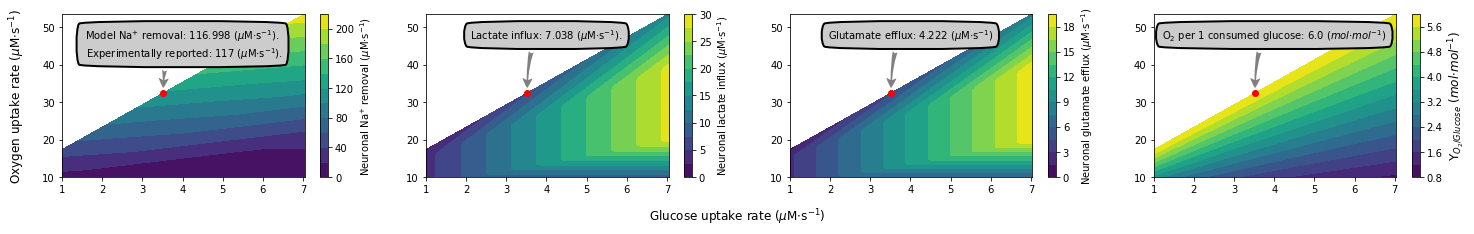

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredAuxTransformBox
from matplotlib.patches import Ellipse

#fig, ax = plt.subplots(2,2,  gridspec_kw={'width_ratios': [1,1],'height_ratios': [.4,.4]},figsize=(14,7))
fig, ax = plt.subplots(1,4,figsize=(25,3))

X, Y   = GLCt1r, -1*EX_o2_e 

#-------------Neuronal Na$^{+}$ removal
Z      = NaKt_Neuron
cp     = ax[0].contourf(X, Y, Z, levels = 12)
plt.colorbar(cp,ax=ax[0]).set_label('Neuronal Na$^{+}$ removal ($\mu$M$\cdot$s$^{-1}$)', size=10)
bbox_props = dict(boxstyle="round4,pad=0.7", fc="0.8", ec="k", lw=2)
ax[0].plot([3.519], [32.407], 'o', color='red')
ax[0].annotate('Model Na$^{+}$ removal: 116.998 ($\mu$M$\cdot$s$^{-1}$).\n Experimentally reported: 117 ($\mu$M$\cdot$s$^{-1}$).', xy=(3.519, 32.407),  xycoords='data', xytext=(4, 50), textcoords='data', fontsize = 10, bbox=bbox_props,size=10,ha="center", va="top",
                  arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1,tail_width=0.5",fc="0.5", ec="none",shrinkB=5,connectionstyle="angle3,angleA=0,angleB=-90"),
                  horizontalalignment='right', verticalalignment='top',clip_on=False)

#--------------Neuronal lactate influx 
Z    = L_LACt2r_Neuron
cp   = ax[1].contourf(X, Y, Z,  levels = 12)
plt.colorbar(cp,ax=ax[1]).set_label('Neuronal lactate influx ($\mu$M$\cdot$s$^{-1}$)', size=10)
vbbox_props = dict(boxstyle="round4,pad=0.7", fc="0.8", ec="k", lw=2)
ax[1].plot([3.519], [32.407], 'o', color='red')
ax[1].annotate('Lactate influx: 7.038 ($\mu$M$\cdot$s$^{-1}$).', xy=(3.519, 32.407),  xycoords='data', xytext=(4, 50), textcoords='data', fontsize = 10, bbox=bbox_props,size=10,ha="center", va="top",
                  arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1,tail_width=0.5",fc="0.5", ec="none",shrinkB=5,connectionstyle="angle3,angleA=0,angleB=-90"),
                  horizontalalignment='right', verticalalignment='top',clip_on=False)

#---------------Neuronal glutamate efflux
Z    = GLUVESSEC_Neuron
cp   = ax[2].contourf(X, Y, Z, levels = 12)
plt.colorbar(cp,ax=ax[2]).set_label('Neuronal glutamate efflux ($\mu$M$\cdot$s$^{-1}$)', size=10)
vbbox_props = dict(boxstyle="round4,pad=0.7", fc="0.8", ec="k", lw=2)
ax[2].plot([3.519], [32.407], 'o', color='red')
ax[2].annotate('Glutamate efflux: 4.222 ($\mu$M$\cdot$s$^{-1}$)', xy=(3.519, 32.407),  xycoords='data', xytext=(4, 50), textcoords='data', fontsize = 10, bbox=bbox_props,size=10,ha="center", va="top",
                  arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1,tail_width=0.5",fc="0.5", ec="none",shrinkB=5,connectionstyle="angle3,angleA=0,angleB=-90"),
                  horizontalalignment='right', verticalalignment='top',clip_on=False)

#-------------------Yield O2/glc
Z    = -1*EX_o2_e/(GLCt1r_Neuron+GLCt1r)#ATPS4m_Neuron/(GLCt1r_Neuron+GLCt1r)
cp   = ax[3].contourf(X, Y, Z,  levels = 13)
plt.colorbar(cp,ax=ax[3]).set_label('Y$_{O_2/Glucose}$ ($mol$$\cdot$$mol$$^{-1}$)', size=12)
vbbox_props = dict(boxstyle="round4,pad=0.7", fc="0.8", ec="k", lw=2)
ax[3].plot([3.519], [32.407], 'o', color='red')
ax[3].annotate('O$_2$ per 1 consumed glucose: 6.0 ($mol$$\cdot$$mol$$^{-1}$)', xy=(3.519, 32.407),  xycoords='data', xytext=(4, 50), textcoords='data', fontsize = 10, bbox=bbox_props,size=10,ha="center", va="top",
                  arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1,tail_width=0.5",fc="0.5", ec="none",shrinkB=5,connectionstyle="angle3,angleA=0,angleB=-90"),
                  horizontalalignment='right', verticalalignment='top',clip_on=False)
# Set common labels
fig.text(0.5, -0.06, 'Glucose uptake rate ($\mu$M$\cdot$s$^{-1}$)', ha='center', va='center', fontsize = 12)
fig.text(0.1, 0.5, 'Oxygen uptake rate ($\mu$M$\cdot$s$^{-1}$)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.savefig('hola.png',facecolor='w', edgecolor='w')